## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    


In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [8]:

"""
Set your training loop
"""
results = {}
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 120us/step - loss: 6.0219 - acc: 0.2655 - val_loss: 5.8082 - val_acc: 0.3414
Epoch 2/50
50000/50000 [==============================] - 6s 115us/step - loss: 5.7185 - acc: 0.3649 - val_loss: 5.6343 - val_acc: 0.3805
Epoch 3/50
50000/50000 [==============================] - 6s 114us/step - loss: 5.5695 - acc: 0.3943 - val_loss: 5.5075 - val_acc: 0.4066
Epoch 4/50
50000/50000 [==============================] - 6s 114us/step - loss: 5.4482 - acc: 0.4171 - val_loss: 5.3942 - val_acc: 0.4259
Epoch 5/50
50000/50000 [==============================] - 6s 114us/step - loss: 5.3397 - acc: 0.4324 - val_loss: 5.2957 - val_acc: 0.4328
Epoch 6/50
50000/50000 [==============================] - 6s 113us/step - loss: 5.2391 - acc: 0.4480 - val_loss: 5.2072 - val_acc: 0.4487
Epoch 7/50
50000/50000 [==============================] - 6s 114us/step - loss: 5.1466 - acc: 0.4573 - val_loss: 5.1173 - 

Epoch 2/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.8162 - acc: 0.3615 - val_loss: 1.7677 - val_acc: 0.3805
Epoch 3/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.7299 - acc: 0.3932 - val_loss: 1.6994 - val_acc: 0.4071
Epoch 4/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.6679 - acc: 0.4158 - val_loss: 1.6490 - val_acc: 0.4251
Epoch 5/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.6181 - acc: 0.4346 - val_loss: 1.6024 - val_acc: 0.4399
Epoch 6/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5764 - acc: 0.4484 - val_loss: 1.5765 - val_acc: 0.4454
Epoch 7/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5416 - acc: 0.4623 - val_loss: 1.5673 - val_acc: 0.4454
Epoch 8/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5119 - acc: 0.4698 - val_loss: 1.5157 - val_acc: 0.4630
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 6s 115us/step - loss: 1.7286 - acc: 0.3928 - val_loss: 1.6961 - val_acc: 0.4036
Epoch 4/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.6663 - acc: 0.4139 - val_loss: 1.6553 - val_acc: 0.4143
Epoch 5/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.6182 - acc: 0.4313 - val_loss: 1.5980 - val_acc: 0.4382
Epoch 6/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5764 - acc: 0.4484 - val_loss: 1.5668 - val_acc: 0.4445
Epoch 7/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5426 - acc: 0.4575 - val_loss: 1.5401 - val_acc: 0.4551
Epoch 8/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.5116 - acc: 0.4694 - val_loss: 1.5325 - val_acc: 0.4536
Epoch 9/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.4870 - acc: 0.4778 - val_loss: 1.5073 - val_acc: 0.4625
Epoch 10/50
50000/50000 [====================

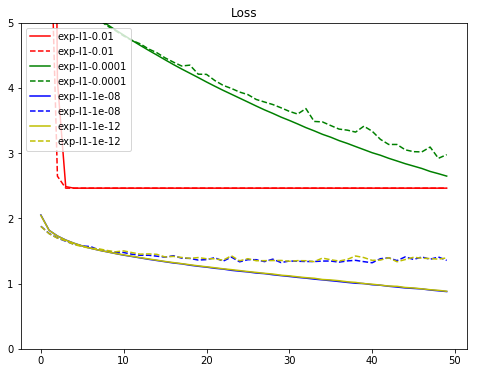

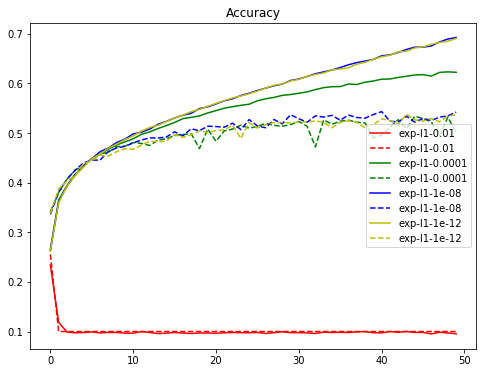

In [9]:

"""
plot the results
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [10]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4, l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio,l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio,l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [14]:
results = {}
keras.backend.clear_session() # 把舊的 Graph 清掉
print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]
    
exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

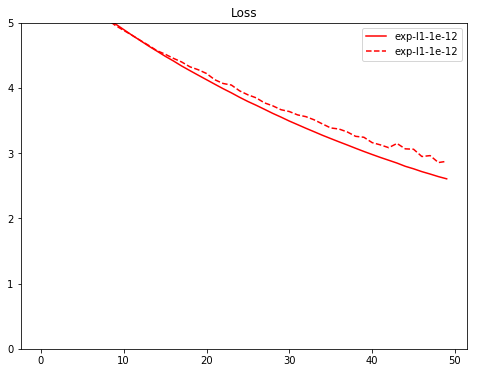

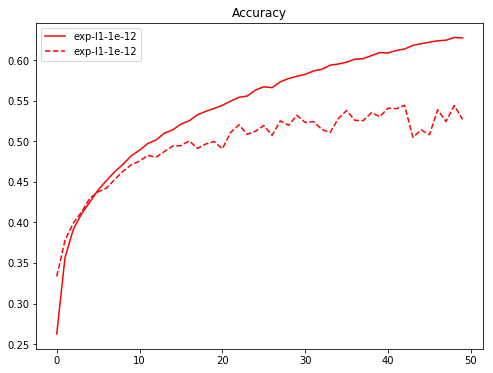

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()